In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("patients_cleaned.csv")
print(df)

     Patient_ID Date_of_Admission            Name  Age  Gender  \
0            10        10-07-2025            John   25    Male   
1            25        25-07-2025           Sarah   28  Female   
2            40        09-08-2025            Alex   25    Male   
3            55        24-08-2025         Michael   28    Male   
4            70        07-09-2025            Emma   25  Female   
..          ...               ...             ...  ...     ...   
174          49        18-08-2025  Nathaniel Kemp   78  Female   
175          64        01-09-2025    Jacob Murray   70    Male   
176          79        16-09-2025   Anthony Green   78  Female   
177          94        01-10-2025  Trevor Freeman   70    Male   
178         109        16-10-2025   Michael Smith   78    Male   

              Diseases              Treatement  Waiting_time    Doctor   Cost  \
0    Allergic Reaction   Epinephrine Injection           1.0     Dhole    100   
1    Allergic Reaction   Epinephrine Injectio

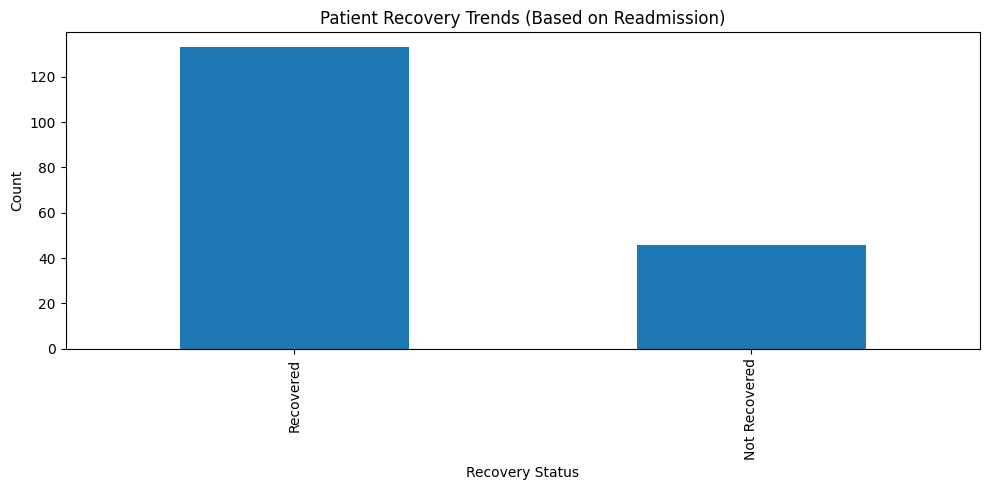

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("patients_cleaned.csv")

# Create Recovery_Status based on Readmission column
df["Recovery_Status"] = df["Readmission"].apply(
    lambda x: "Recovered" if str(x).strip().lower() == "no" else "Not Recovered"
)

# Count recovery categories
recovery_counts = df["Recovery_Status"].value_counts()

# Plot graph
plt.figure(figsize=(8,5))
recovery_counts.plot(kind="bar")
plt.title("Patient Recovery Trends (Based on Readmission)")
plt.xlabel("Recovery Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


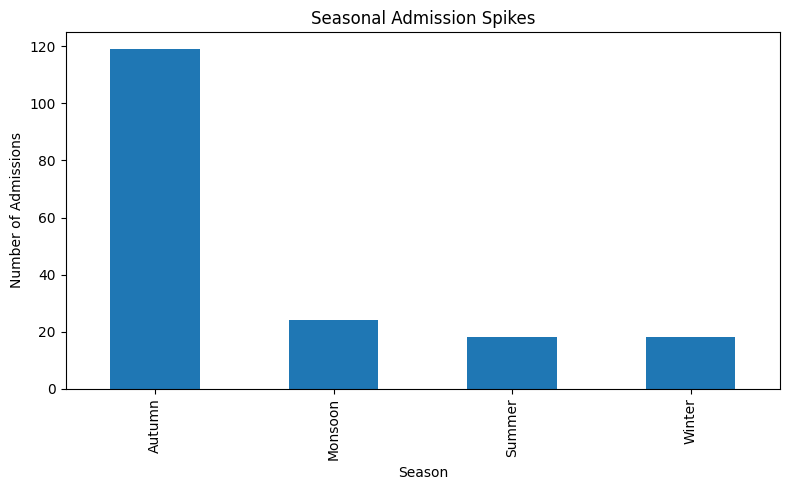

In [6]:
# 2. Seasonal Admission Spikes
# ------------------------------

# Date conversion
df["Date_of_Admission"] = pd.to_datetime(df["Date_of_Admission"], errors="coerce")

# Season extraction
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Autumn"

df["Season"] = df["Date_of_Admission"].dt.month.apply(get_season)

season_counts = df["Season"].value_counts()

plt.figure(figsize=(8,5))
season_counts.plot(kind="bar")
plt.title("Seasonal Admission Spikes")
plt.xlabel("Season")
plt.ylabel("Number of Admissions")
plt.tight_layout()
plt.show()
# 3. Average Stay Duration per Disease
# ------------------------------

if "Disease" in df.columns and "length_of_stay" in df.columns:
    avg_stay_disease = df.groupby("Disease")["length_of_stay"].mean()

    plt.figure(figsize=(10,5))
    avg_stay_disease.plot(kind="bar")
    plt.title("Average Stay Duration per Disease")
    plt.xlabel("Disease")
    plt.ylabel("Average Stay (Days)")
    plt.tight_layout()
    plt.show()


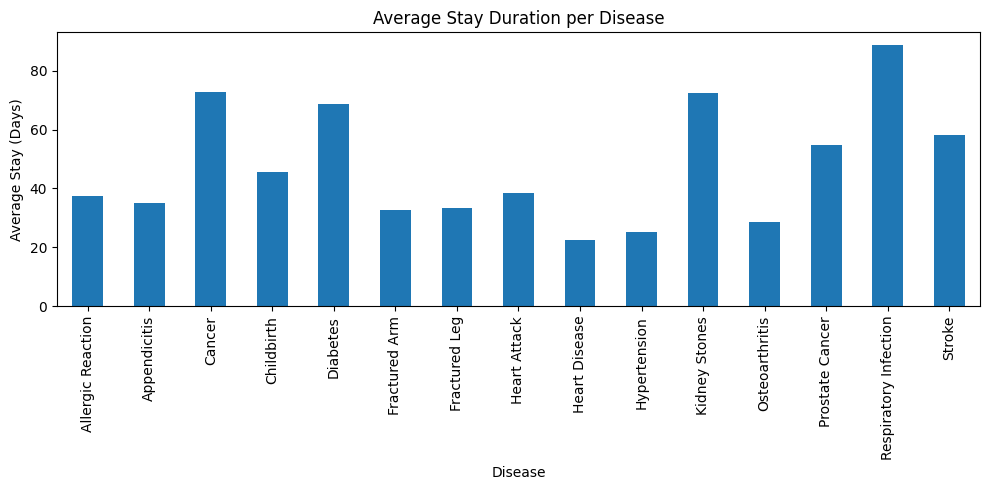

In [3]:

if "Diseases" in df.columns and "Lenth_of_Stay" in df.columns:

    avg_stay_disease = df.groupby("Diseases")["Lenth_of_Stay"].mean()

    plt.figure(figsize=(10, 5))
    avg_stay_disease.plot(kind="bar")
    plt.title("Average Stay Duration per Disease")
    plt.xlabel("Disease")
    plt.ylabel("Average Stay (Days)")
    plt.tight_layout()
    plt.show()

else:
    print("Columns missing in dataset.")


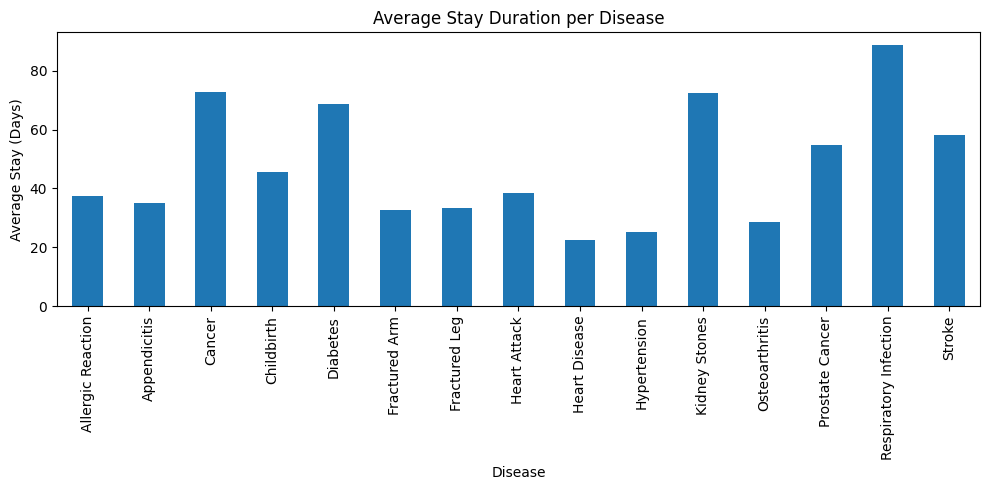

In [5]:
if "Diseases" in df.columns and "Lenth_of_Stay" in df.columns:
    avg_stay_disease = df.groupby("Diseases")["Lenth_of_Stay"].mean()

    plt.figure(figsize=(10,5))
    avg_stay_disease.plot(kind="bar")
    plt.title("Average Stay Duration per Disease")
    plt.xlabel("Disease")
    plt.ylabel("Average Stay (Days)")
    plt.tight_layout()
    plt.show()
else:
    print("Columns missing in dataset.")
